#### User Manual - mapField application

##### The following notebook provides a description of the mapField application which is designed to create geographically referenced polygons based on user provided field dimensions and plot divisions. 

##### mapField contains seven functions that are used within each data processing step in defining the field grid. 

In [1]:
import mapField
from mapField import (grid_dim, plot_grid, plot_buffer, 
                      rot_plots,read_csv,write_shapes,makeGrid)
import csv
import warnings
warnings.filterwarnings('ignore')

In [2]:
x_extent = 400 
y_extent = 500

field_rows = 8
field_cols = 13

matrix = (0,1,0,-1,0,0)

title = 'Test'


#### grid_dim(x_extent,y_extent,field_rows,field_cols,matrix):
##### Function to define a field extent and number of test plot divisions in a study area. 

#### Arguments:

##### x_extent and y_extent: The horizontal and vertical extent of the entire test area.

##### field_rows and field_cols: The number of horizontal and vertical divisions respectively in which the test area is devided. The application assumes that the test area as been divided into a regular grid. 

##### matrix: The affine-transform matrix that the out-put field grid lines and polygons will be transformed to. This affine-transfomr matrix should collected from the input raster image that the resulting polygons should mapped to. 

#### Returns: 
##### - grid: a non-transformed grid of dimensions as defined by the user. 
##### - agrid a transformed grid of dimensions as defined by the user. 

In [3]:
grid,agrid = grid_dim(x_extent,y_extent,field_rows,field_cols,matrix)

#### plot_grid(grid,angle,title=title)

#### Arguments: 
##### grid: a MultiLineGrid as returned by grid_dim

##### angle: The clock-wise angle of rotation required to allign the grid with the field plots
##### title: Optionally a title of output field grid can be added

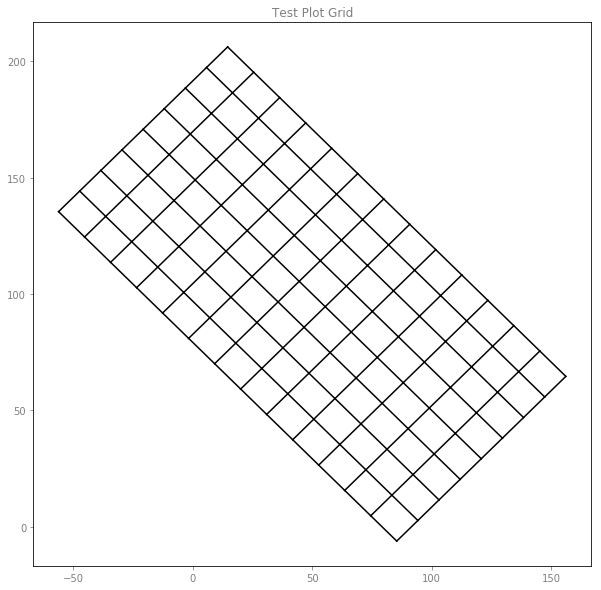

In [4]:
angle = 45
distance = 1.0

plot_grid(grid,angle,title=title)

#### rot_plots(grid,buffer,angle,xo,yo,matrix):
##### This function calculated field plot polygons based on a predefined grid structure. The polygons are then rotated, translated to the coordinate projection space of the test area, and inner-buffered to account for non-regularities in the field polt space. 

#### Arguments:
##### grid: a MultiLineGrid as returned by grid_dim
##### buffer: The parellel distance from the plot grid boundaries that the calculated plot polygons will be given to account for irregularities in field plot spacing. 
##### angle: The clock-wise angle of rotation required to allign the grid with the test area
##### xo, yo : The x and y coordinate of the NE corner of the field plot to which the plot grids should be translated to and rotated about.  

#### Returns:
##### apoly: An affine transformed and translated multi-polygon vector geometry
##### poly: A multi-polygon vector
##### tgrid: A multi-line field grid that is translated to the xo,yo points. 

In [56]:
buffer = 2
angle = 45
xo = 1200
yo = 2200

apoly,poly,tgrid = rot_plots(grid,buffer,angle,xo,yo,matrix)

#### plot_buffer(poly,grid,title): 
##### Function to plot the polygons created by the rot_plots function

#### Arguments:
##### poly: A multi-polygon vector
##### grid: A multi-line field grid that is translated to the xo,yo origin points of poly. 
##### title: Optional title to be plotted. 

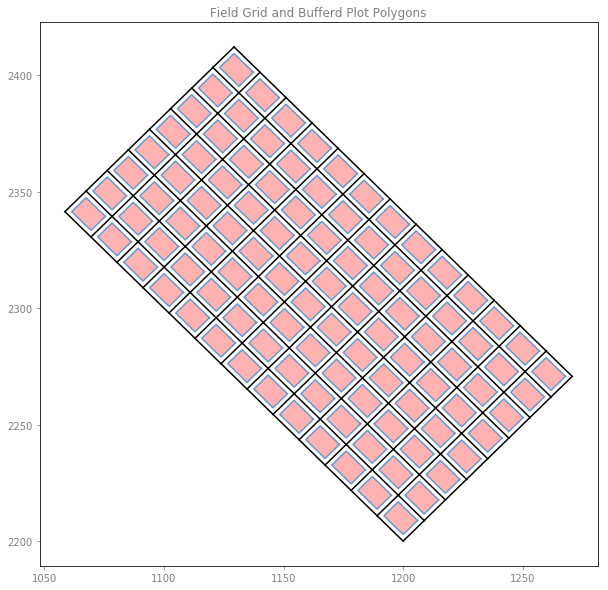

In [6]:
plot_buffer(grid=tgrid,polygons=poly,title='Field Grid and Bufferd Plot Polygons')